# Topic Modeling — With Tomotopy

Author: Melanie Walsh (adapted by Federico Pianzola)

In these lessons, we're learning about a text analysis method called *topic modeling*. This method will help us identify the main topics or discourses within a collection of texts or single text that has been separated into smaller text chunks.

In this particular lesson, we're going to use [Tomotopy](https://github.com/bab2min/tomotopy) to topic model 379 obituaries published by *The New York Times*.

Tomotopy is a topic modeling tool that is written purely in Python, and it seems to be a good alternative to Mallet. Mallet is a tool widely embraced throughout the DH community, but it can also pose challenges for scholars because it requires the installation and configuration of Mallet/the Java Development Kit.

For reference, here are some useful tips written by Maria Antoniak: https://maria-antoniak.github.io/2022/07/27/topic-modeling-for-the-people.html

___

## Dataset

### *New York Times* Obituaries

<blockquote class="epigraph" style=" padding: 10px">

 Georgia O'Keeffe, the undisputed doyenne of American painting and a leader, with her husband, Alfred Stieglitz, of a crucial phase in the development and dissemination of American modernism, died yesterday at St. Vincent Hospital in Santa Fe, N.M.

<p class ="attribution">
    —Edith Evans Asbury, <a href="https://www.nytimes.com/1986/03/07/obituaries/georgia-o-keeffe-dead-at-98-shaper-of-modern-art-in-us.html">Georgia O'Keefe Dead At 98</a>
    </p>
    
</blockquote>

This dataset is based on data originally collected by Matt Lavin for his *Programming Historian* [TF-IDF tutorial](https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf#lesson-dataset). I (Melanie Walsh)) have re-scraped the obituaries so that the subject's name and death year is included in each text file name, and I have added 13 more ["Overlooked"](https://www.nytimes.com/interactive/2018/obituaries/overlooked.html) obituaries, including [Karen Spärck Jones](https://www.nytimes.com/2019/01/02/obituaries/karen-sparck-jones-overlooked.html), the computer scientist who introduced TF-IDF.

___

## Install Packages

In [5]:
!pip install tomotopy

# if you get the error: "ERROR: Could not build wheels for tomotopy, which is required to install pyproject.toml-based projects"
# it's better to run this notebook on Colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 49.5 MB/s eta 0:00:00


In [2]:
!pip install little_mallet_wrapper

In [3]:
# run this only if you need Colab
# remember to put the unzipped folder "NYT_Obituaries"
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Packages

Now let's import `tomotopy`, `little_mallet_wrapper` and the data viz library `seaborn`.

We're also going to import [`glob`](https://docs.python.org/3/library/glob.html) and [`pathlib`](https://docs.python.org/3/library/pathlib.html#basic-use) for working with files and the file system.

In [6]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd

## Get Training Data From Text Files

Before we topic model the *NYT* obituaries, we need to process the text files and prepare them for analysis. The steps below demonstrate how to process texts if your corpus is a collection of separate text files.

:::{note}
    
We're calling these text files our *training data*, because we're *training* our topic model with these texts. The topic model will be learning and extracting topics based on these texts.
    
:::

To get the necessary text files, we're going to make a variable and assign it the file path for the directory that contains the text files.

In [7]:
# change the path to match the directory where you put the unzipped "NYT-Obituaries" folder
directory = "/content/drive/MyDrive/teaching/Analysing_Data/week6/NYT-Obituaries"

Then we're going to use the `glob.gob()` function to make a list of all (`*`) the `.txt` files in that directory.

In [8]:
files = glob.glob(f"{directory}/*.txt")

Next we process our texts with the function `little_mallet_wrapper.process_string()`.

This function will take every individual text file, transform all the text to lowercase as well as remove stopwords, punctuation, and numbers, and then add the processed text to our master list `training_data`.

Take a moment to study this code and reflect about what’s happening here. This is a very common Python pattern! We make an empty list, iterate through every file, open and read each text file, process the texts, and finally append them to the previously empty list.

In the last line, we extract the relevant part of each file name by using `Path().stem`, which conveniently extracts just the last part of the file path without the `.txt` file extension. Because each file name includes the obituary subject’s name as well as the year that the subject died, we’re going to use this information as a title or label for each obituary.

In [9]:
training_data = []
original_texts = []
titles = []

for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)
    original_texts.append(text)
    titles.append(Path(file).stem)

In [10]:
len(training_data), len(original_texts), len(titles)

(379, 379, 379)

## Train Topic Model

We’re going to train our topic model with the [`tp.LDAModel()`](https://bab2min.github.io/tomotopy/v0.12.6/en/#tomotopy.LDAModel) function, which provides Latent Dirichlet Allocation(LDA) topic modelling. Its implementation is based on following papers:

* Blei, D.M., Ng, A.Y., &Jordan, M.I. (2003). Latent dirichlet allocation.*Journal of machine Learning research*, 3(Jan), 993 - 1022.
* Newman, D., Asuncion, A., Smyth, P., &Welling, M. (2009). Distributed algorithms for topic models. *Journal of Machine Learning Research*, 10(Aug), 1801 - 1828.

In [12]:
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')


Topic Model Training...


Iteration: 0	Log-likelihood: -10.176773102305846
Iteration: 10	Log-likelihood: -9.802372471551458
Iteration: 20	Log-likelihood: -9.667036386142208
Iteration: 30	Log-likelihood: -9.5920392930888
Iteration: 40	Log-likelihood: -9.536328059452682
Iteration: 50	Log-likelihood: -9.494089079040513
Iteration: 60	Log-likelihood: -9.46334498858331
Iteration: 70	Log-likelihood: -9.435202290149395
Iteration: 80	Log-likelihood: -9.407570382541357
Iteration: 90	Log-likelihood: -9.390482731117833


## Display Topics and Top Words

To examine the 15 topics that the topic model extracted from the NYT obituaries, run the cell below.

Take a minute to read through every topic. Reflect on what each topic seems to capture as well as how well you think the topics capture the broad themes of the entire collection. Note any oddities, outliers, or inconsistencies.

In [13]:
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

years died two received first school born known john american

✨Topic 1✨

wrote said book love writer first broadway films writing story

✨Topic 2✨

said one house many man kennedy called also good later

✨Topic 3✨

president state roosevelt united states political government congress secretary truman

✨Topic 4✨

world million baseball game won year one played high series

✨Topic 5✨

miss film art theater movie york stage movies actor new

✨Topic 6✨

one would man life could years said much even came

✨Topic 7✨

made general grant gen upon men office one great without

✨Topic 8✨

year first time mrs became said last war family public

✨Topic 9✨

black justice court louis said white hoover rights king wrote

✨Topic 10✨

work world published university also professor book human study life

✨Topic 11✨

war united general army france french israel peace nations military

✨Topic 12✨

music band jazz new piano musical sinatra composer goodman first

✨Topic 

## Examine Top Documents and Titles

### Load topic distributions

Tomotpy also calculates the likely mixture of these topics for every single obituary in the corpus. This mixture is really a probability distribution, that is, the probability that each topic exists in the document. We can use these probability distributions to examine which of the above topics are strongly associated with which specific obituaries.

In [14]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

If we look at a topic distribution in this list of `topic_distributions`, we will see a list of 15 probabilities. This list corresponds to the likelihood that each of the 15 topics exists in the selected obituary.

In [15]:
topic_distributions[32]

[0.053192474,
 0.12484253,
 0.11030467,
 0.0117818145,
 0.1048226,
 0.18254249,
 0.17403275,
 0.03516283,
 0.10532947,
 0.0041501685,
 0.055179156,
 0.000560131,
 0.00041021107,
 0.02941271,
 0.008276029]

It’s a bit easier to understand if we pair these probabilities with the topics themselves. It’s a bit easier to understand if we pair these probabilities with the topics themselves. For example, as you can see below, Topic 5 “miss film theater movie broadway films” has a relatively high probability of existing in Marilyn Monroe’s obituary `.182` while Topic 14 “soviet party mao hitler china war” has a relatively low probability `.008`. This seems to comport with what we know about Marilyn Monroe.

In [40]:
obituary_to_check = "1962-Marilyn-Monroe"

obit_number = titles.index(obituary_to_check)

print(f"Topic Distributions for {titles[obit_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[obit_number])):
    print(f"✨Topic {topic_number} {topic[:40]} ✨\nProbability: {round(topic_distribution, 3)}\n") # I'm limiting the string shown to the first 40 characters, to display only some of the words in teh topic

Topic Distributions for 1962-Marilyn-Monroe

✨Topic 0 years died two received first school bor ✨
Probability: 0.05299999937415123

✨Topic 1 wrote said book love writer first broadw ✨
Probability: 0.125

✨Topic 2 said one house many man kennedy called a ✨
Probability: 0.10999999940395355

✨Topic 3 president state roosevelt united states  ✨
Probability: 0.012000000104308128

✨Topic 4 world million baseball game won year one ✨
Probability: 0.10499999672174454

✨Topic 5 miss film art theater movie york stage m ✨
Probability: 0.18299999833106995

✨Topic 6 one would man life could years said much ✨
Probability: 0.17399999499320984

✨Topic 7 made general grant gen upon men office o ✨
Probability: 0.03500000014901161

✨Topic 8 year first time mrs became said last war ✨
Probability: 0.10499999672174454

✨Topic 9 black justice court louis said white hoo ✨
Probability: 0.004000000189989805

✨Topic 10 work world published university also pro ✨
Probability: 0.054999999701976776

✨Topic 11 war unite

### Display top documents

We can also display the documents with the highest probability of having a certain topic. To do that, we need the functions below. The `get_top_docs()` function is taken from Maria Antoniak's [Little Mallet Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L164)

In the cell below, we’re importing two special Jupyter notebook display modules, which will allow us to make the relevant topic words bolded, as well as the regular expressions library `re`, which will allow us to find and replace the correct words.

In [27]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [28]:
# Display 6 documents for topic 0
get_top_docs(titles, topic_distributions, topic_index=0, n=6)

### ✨Topic 0✨

years died two received first school born known john american



---


✨  
**Topic Probability**: 0.44664448499679565  
**Document**: 1931-Melvil-Dewey



✨  
**Topic Probability**: 0.3762566149234772  
**Document**: 1929-Marie-Curie



✨  
**Topic Probability**: 0.36383166909217834  
**Document**: 1930-Elmer-Sperry



✨  
**Topic Probability**: 0.34564897418022156  
**Document**: 1956-Charles-Merrill



✨  
**Topic Probability**: 0.34225475788116455  
**Document**: 1968-Yuri-Gagarin



✨  
**Topic Probability**: 0.3419496715068817  
**Document**: 1998-Alan-B-Shepard-Jr



### Display Topic Words in Context of Original Text

Often it’s useful to actually look at the document that has ranked highly for a given topic and puzzle out why it ranks so highly.

In [31]:
# Display 2 documents for topic 1
get_top_docs(original_texts, topic_distributions, topic_index=1, n=2)

### ✨Topic 1✨

wrote said book love writer first broadway films writing story



---


✨  
**Topic Probability**: 0.3466896414756775  
**Document**: March 19, 1986

 OBITUARY

 Bernard Malamud Dies at 71; Chronicled Human Struggle

 By MERVYN ROTHSTEIN

 Bernard Malamud, the novelist and short **story** **writer** who won two National Book Awards and the Pulitzer Prize for his chronicles of human struggle, died yesterday at his Manhattan apartment. He was 71 years old.

 Mr. Malamud's work showed a regard for Jewish tradition and the plight of ordinary men, and was imbued with the theme of moral wisdom gained through suffering.

 Mr. Malamud was considered by many critics to be one of the finest contemporary American writers. The critic Robert Alter **said** that stories like ''The First Seven Years,'' ''The

 Magic Barrel,'' ''The Last Mohican,'' ''Idiots First'' and ''Angel Levine'' will be read ''as long as anyone continues to care about American fiction written in the 20th century.''

 The author once described himself as a chronicler of ''simple people struggling to make their lives better in a world of bad luck.'' One of his last appearances was at the PEN Congress in New York in January where he read from his works.

 In his work, Mr. Malamud often combined fantasy and reality to create a world that was both the same and different from the one we live in.

 In ''Angel Levine,'' a black, rather seedy-looking angel appears to a retired Jewish tailor; in ''The Jewbird,'' a Yiddish-accented vagabond makes his way into an urban Jewish household in the form of a crow; in ''Idiots First,'' the Angel of Death, alias Ginzburg, pursues a desperate Jew trying to scrape together money to send his idiot son to California on the midnight train. ''Malamud has been in the fable business, so to speak,'' the critic Alan Lelchuk **wrote**.

 Mr. Malamud's **first** novel, ''The Natural,'' an allegory about the rise and fall of a baseball player, was published in 1952. It is different from most of his work in that there are no Jewish characters. After the **book** was made into a movie starring Robert Redford in 1984, Mr. Malamud **said** in an interview that he was grateful for the film because it allowed him ''to be recognized once more as an American **writer**'' as opposed to a Jewish writer. But ''The Natural'' is similar to his later novels and stories in that it lies in the realm of a morality play. ''Malamud has always had a fondness for telling tales arranged for the purpose of a specific moral lesson,'' Mr. Lelchuk **wrote**. ''Neither realism nor surrealism has been his forte through the years,'' he continued, ''but the fable, the parable, the allegory, the ancient art of basic storytelling in a modern voice; through this special mode he has earned his high place in contemporary letters.'' ''The Assistant,'' his second novel, and the one many critics consider his best, was published in 1957. Set in the Depression, it tells of a Jewish grocery store owner and his Italian assistant, and it, too, is much like a morality play. ''The Fixer'' (1966) was inspired by the ordeal of Mendel Beiliss, a Jew tried and acquitted of ritual murder in Kiev in czarist Russia of 1913. ''The Magic Barrel,'' the author's **first** collection of short stories, was given the National Book Award in 1959.

 On the basis of ''The Assistant'' and ''The Fixer,'' critics began to think of Mr. Malamud as a ''Jewish writer'' along with Saul Bellow and

 Philip Roth.

 Mr. Malamud, however, said that he found the label of ''Jewish writer'' inadequate. He said that the three writers shared more differences than similarities, and that, in his case,

 Jewishness was more a spiritual than a cultural or a religious quality. ''I was concerned with what Jews stood for,'' he said, ''with their getting down to the bare bones of things. I was concerned with their ethicality - how Jews felt they had to live in order to go on living.''

 And at another time he commented: ''Jewishness is important to me, but I don't consider myself only a Jewish writer. I have interests beyond that, and I feel I'm **writing** for all men.''

 Mr. Roth agreed with Mr. Malamud. ''The Jews of 'The Magic Barrel' and the Jews of 'The Assistant' are not the Jews of New York City or Chicago,'' Mr. Roth wrote. ''They are Malamud's invention, a metaphor of sorts to stand for certain possibilities and promises.''

 Later Works Criticized

 Mr. Malamud's later works - ''Pictures of Fidelman,'' ''The Tenants,'' ''God's Grace'' and to a lesser extent, ''Dubin's

 Lives'' - got mixed reviews. Many critics cited a growing bleakness in his work, saying that as he left his Jewish milieu for academic and other settings his work took on a flinty emptiness without the poignance and meaning that characterized his earlier novels. His argument with God, they said, seemed to wither into a seminar.

 Others, however, saw a growth in these works - his handling in ''The Tenants'' of the cultural and psychological upheaval among blacks caused by the rise of nationalism, separatism and racial pride; the powerful presence of nature in ''Dubin's Lives,'' something new for an author whose works for the most part had urban settings, and the concern with man's survival in the nuclear age in ''God's Grace.''

 Bernard Malamud was born April 26, 1914, in Brooklyn, the eldest of two sons of Russian Jewish immigrants, Max Malamud and the former Bertha Fidelman.

 His father ran a small grocery, working 16 hours a day - he served as a model for the Jewish grocer in ''The Assistant.'' Looking back on his childhood, Mr. Malamud would recall that there were no books in his home, no cultural nourishment at all except that on Sundays he would listen to someone else's piano through the living room window.

 He attended Erasmus Hall High School in Brooklyn, and in 1936 he received his B.A. from the City College of New York. After graduation, he worked in a factory, in various stores and as a clerk in the

 Census Bureau in Washington, **writing** in his spare time.

 Began Teaching High School

 In 1940, he got a job teaching at Erasmus Hall Evening High School, and he would continue to teach in New York City evening high schools until 1949. While he was teaching, he earned an M.A. at Columbia

 University in 1942.

 Mr. Malamud often said that the advent of World War II and the Holocaust first made him sure that he had something to say as a writer. Until then, he said, he had not given much thought to what it meant to be Jewish, but the horror of the war - as well as the fact that he had married a gentile woman, Ann de Chiara, in 1945 - made him question his own identity as a Jew and compelled him to start reading about Jewish tradition and history. He knew then, he said, that he really wanted to write. ''The suffering of the Jews is a distinct thing for me,'' he once explained. ''I for one believe that not enough has been made of the tragedy of the destruction of six million

 Jews. Somebody has to cry - even if it's a writer, 20 years later.''

 In 1949, he got a job teaching English at Oregon state University, where he stayed until 1961, becoming an associate professor. He wrote four books there - ''The Natural,'' ''The

 Assistant,'' ''The Magic Barrel'' and his third novel, ''A New Life'' (1961), which is set in the Pacific Northwest at a college not unlike Oregon

 State.

 In 1961, he went to teach at Bennington College in Vermont, where he taught for more than 20 years, with the exeception of two years he spent as a visiting lecturer at Harvard from 1966 to 1968.

 In 1963, he published ''Idiots First,'' another **story** collection. That was followed by ''The Fixer'' (1966), ''Pictures of Fidelman,'' stories about one central character (1969); ''The Tenants,'' a novel about the conflict between two writers, one Jewish and the other black (1971); ''Rembrandt's Hat,'' more stories (1973); ''Dubin's Lives,'' a novel about a biographer in midlife that many critics consider one of his best (1979); ''God's Grace,'' a novel (1982), and ''The Stories of Bernard Malamud'' (1983). 'Story, Story, Story'

 Mr. Malamud was a firm believer that a story should tell a story. ''With me, it's story, story, story,'' he once said. ''Writers who can't invent stories often pursue other strategies, even substituting style for narrative. I feel that story is the basic element of fiction though that ideal is not popular with disciples of the 'new novel.' They remind me of the painter who couldn't paint people, so he painted chairs. ''The story will be with us as long as man is. You know that, in part, because of its effect on children. It's through story they realize that mystery won't kill them. Through story they learn they have a future.''

 He did not find writing an easy task. ''The idea is to get the pencil moving quickly,'' he said. ''Once you've got some words looking back at you you can take two or three - or throw them away and look for other. I go over and over a page. Either it bleeds and shows it's beginning to be human, or the form emits shadows of itself and I'm off. I have a terrifying will that way.''

 In his writing, he prized the idea of swift transition - changing a scene in one sentence between paragraphs -and he thought he might have achieved that talent by studying intercutting in motion pictures. ''I was influenced very much by Charlie Chaplin movies,'' he said, ''by the rhythm and snap of his comedy and his wonderful, wonderful mixture of comedy and sadness.''

 He acknowledged that sadness was one of his prime topics. ''People say I write so much about misery,'' he said, but added, ''you write about what you write best.''

 He described the essential Malamud character as ''someone who fears his fate, is caught up in it, yet manages to outrun it; he's the subject and object of laughter and pity.''

 In addition to the Pulitzer and the National Book Awards, Mr. Malamud won the Rosenthal Award of the National Institute of Arts and Letters, Vermont's 1979 Governor's Award for Excellence in the Arts and the 1981 Brandeis Creative Arts Award. He was a member of the American Academy and institute of Arts and Letters, which in 1983 presented him its Gold Medal in Fiction. From 1979 to 1981 he was president of the PEN American Center.

 For many years, Mr. Malamud did not become involved in social issues, arguing that for an author writing was involvement enough. But as president of PEN, he protested the repression of writers in the

 Soviet Union and South Africa and the curtailing of First Amendment rights.

 Although he granted occasional interviews, Mr. Malamud led an intensely private life. In ''The Ghost Writer,'' Philip Roth created a character named E. I. Lonoff, a novelist ''deeply skeptical of the public world,'' whose ideas of work and esthetic purity obliged him to live a life of solitude. A number of critics have suggested that Lonoff was a portrait of Mr. Malamud.

 Mr. Roth was a good friend of Mr. Malamud, and it is perhaps he who best summed up Mr. Malamud's work. Noting that Mr. Malamud was once supposed to have remarked that ''all men are Jews,''

 Mr. Roth said: ''What it is to be human, and to be humane, is his deepest concern.'

 He is survived by his wife, and by his son Paul and his daughter Janna.

 





✨  
**Topic Probability**: 0.3140312731266022  
**Document**: February 14, 2000

 OBITUARY

 Charles M. Schulz, 'Peanuts' Creator, Dies at 77

 By SARAH BOXER

 Charles M. Schulz, the creator of ''Peanuts,'' the tender and sage comic strip starring Charlie Brown and Snoopy that is read by 355 million people around the world, died in his sleep on Saturday night at his home in Santa Rosa, Calif., just hours before his last cartoon ran in the Sunday newspapers. He was 77.

 The cause of death was colon cancer, **said** Paige Braddock, creative director for Charles M. Schulz Creative Associates.

 Mr. Schulz drew ''Peanuts'' for nearly half a century. He swore that no one else would ever draw the comic strip and he kept his word. For years he drew ''Peanuts'' with a hand tremor. He finally put down his pen when he received a diagnosis of colon cancer after abdominal surgery in November.

 His last daily strip ran on Jan. 3. His last Sunday page, which ran yesterday, carried a signed farewell in which he **said**, ''Charlie Brown, Snoopy, Linus, Lucy . . . how can I ever forget them. . . .'' His wife, Jeannie, said, ''He had done everything he wanted.''

 Lynn Johnston, a friend of Mr. Schulz and the creator of ''For Better or for Worse,'' told The Associated Press, ''It's amazing that he dies just before his last strip is published.'' Such an ending, she said, was ''as if he had written it that way.''

 She recalled something Mr. Schulz told her as she sat in the hospital with him last year: ''You control all these characters and the lives they live. You decide when they get up in the morning, when they're going to fight with their friends, when they're going to lose the game. Isn't it amazing how you have no control over your real life?'' But, Ms. Johnston said, ''I think, in a way, he did.''

 The life of ''Peanuts'' and Charles Schulz were completely intertwined. ''The strip and he were one,'' said Patrick McDonnell, who draws the cartoon ''Mutts.'' ''He put his heart and soul into that strip.'' ''Peanuts,'' which reached readers in 75 countries, 2,600 papers and 21 languages every day, made Mr. Schulz very rich. The ''Peanuts'' strips, merchandise and product endorsements brought in $1.1 billion a year. And Mr. Schulz was said to have earned about $30 million to $40 million annually.

 His saga of Charlie Brown, Snoopy, Lucy and Linus ''is arguably the longest **story** ever told by one human being,'' Robert Thompson, a professor of popular culture at Syracuse University, observed on the PBS ''NewsHour'' with Jim Lehrer, longer than any epic poem, any Tolstoy novel, any Wagner opera. In all Mr. Schulz drew more than 18,250 strips in nearly 50 years.

 Jules Feiffer, the cartoonist and playwright, said that the ''Peanuts'' characters endure because they were the **first** real children in the comics pages, ones with doubts and anxieties. And there were a lot of them. ''Linus,

 Lucy, Charlie Brown -- these interesting little people formed a repertory company,'' he said.

 A Long-Running Ensemble Act

 The cast of ''Peanuts'' changed remarkably little. It included Charlie Brown, a wishy-washy boy with a tree-loving kite and a losing baseball team; Snoopy, an unflappable beagle with a fancy inner life; Lucy, a fussbudget with a football and a curbside psychiatric clinic; Linus, a philosophical blanket-carrier; Sally, Charlie Brown's romantic little sister; Schroeder, a virtuoso on the toy piano and a Beethoven devotee; Peppermint

 Patty, a narcoleptic D-minus student; and, in later years, Woodstock, a small, expressive but speechless bird.

 Mr. Schulz remembered waking up in the night many years ago and thinking, ''Good grief, who are all these little people? Must I live with them for the rest of my life?'' The answer was yes.

 Charles Monroe Schulz, the son of Carl Schulz, a barber, like Charlie Brown's father, and the former Dena Halverson, was born in Minneapolis on Nov. 26, 1922. Young Charles was nicknamed Sparky after the horse Spark Plug in the comic strip ''Barney

 Google.'' He had a black-and-white dog named Spike (memorialized in the character of Snoopy's skinny Western brother).

 He wanted to be a cartoonist as a child and practiced by drawing Popeye. ''Someday, Charles, you're going to be an artist,'' a kindergarten teacher told him after looking at his drawing of a man shoveling snow. His ambition was to do a comic strip as good as George Herriman's ''Krazy Kat,'' but Mr. Schulz also admired Picasso, Andrew Wyeth and Edward Hopper. Snoopy kept a van Gogh and a Wyeth in his doghouse.

 The hurts of Mr. Schulz's early years provided a lifetime of material. At Central High School in St. Paul, he flunked Latin, English, algebra and physics. ''Ripley's Believe It or Not!'' accepted one of his drawings when he was 15 -- a picture of Spike illustrating ''a hunting dog that eats pins, tacks and razor blades'' -- but the cartoons he drew for his high school yearbook were rejected. Mr.

 Schulz remembered his failures more vividly than his successes.

 After his high school graduation he took a correspondence course from Art Instruction Inc., but before he could start a career he was drafted into the Army. He left for boot camp only days after his mother died of cancer. (Mr. Schulz later suggested that this coincidence might have been the reason for his lifelong hatred of travel.) During World War II, from 1943 to 1945, Mr. Schulz served in France and Germany and became a staff sergeant in the 20th Armored Division. He once refused to toss a grenade into an artillery emplacement because he saw a little dog wander into it.

 After the war he tried various odd jobs: lettering the comics at a Catholic magazine called Timeless Topix; drawing a weekly cartoon called ''Li'l Folks,'' the precursor to ''Peanuts,'' for the St. Paul Pioneer

 Press; and selling occasional spot cartoons to The Saturday Evening Post.

 He also taught at Art Instruction Inc. There he fell in **love** with a redhead, Donna Johnson, and proposed marriage. She turned him down and married a fireman instead. He never forgot. Ms. Johnson became the Little Red-Haired Girl, Charlie Brown's unrequited **love**, who was often talked about but never seen in the strip. Mr. Schulz married Joyce Halverson in 1949; the marriage ended in divorce. ''You can't create humor out of happiness,'' Mr. Schulz said in his 1980 **book**, ''Charlie Brown, Snoopy and Me.'' ''I'm astonished at the number of people who write to me saying, 'Why can't you create happy stories for us? Why does Charlie Brown always have to lose? Why can't you let him kick the football?' Well, there is nothing funny about the person who gets to kick the football.''

 The strip's start was bittersweet. In 1949 Mr. Schulz submitted some of his ''Li'l Folks'' comic strips to United Feature Syndicate. The syndicate liked the strip but insisted on calling it ''Peanuts'' because ''Li'l Folks'' was too similar to the name of another strip. ''I was very upset with the title,'' Mr. Schulz once said, ''and still am.''

 On Oct. 2, 1950, the **first** ''Peanuts'' strip was published. It depicted two children sitting on the sidewalk discussing Charlie Brown: ''Well, here comes ol' Charlie Brown!'' . . . ''Good ol'

 Charlie Brown'' . . . ''Yes, sir! Good ol' Charlie Brown.'' And then, as Charlie Brown passes them, ''How I hate him!''

 That year seven newspapers bought ''Peanuts,'' and Mr. Schulz earned $90 a week in royalties. But by 1953 the cartoon was a hit and he was earning $30,000 a year. In 1955 (and again in 1964) the National Cartoonists Society awarded

 Mr. Schulz the Reuben for being the outstanding cartoonist of the year. He received the Yale Humor Award in 1956 and the School Bell Award from the National Education Association in 1960.

 Unrequited Love With Roots in Real Life ''Peanuts'' was based on repetition and predictability. As Mr. Schulz put it, ''All the loves in the strip are unrequited; all the baseball games are lost; all the test scores are D-minuses; the Great Pumpkin never comes; and the football is always pulled away.'' One of the few innovations Mr. Schulz introduced was allowing Snoopy (after eight years) to stand on two feet and to have his thoughts written out in balloons.

 Snoopy could always be counted on to nap, fantasize and wonder when his next meal would arrive. Charlie Brown, the round-headed blockhead (named after one of Mr. Schulz's childhood friends, not after the cartoonist himself), could always be counted on to persevere despite constant failure. He once held onto the string of a kite that was stuck in a tree for eight days running, until the rain made him stop. At the time it was the longest run of immobility for any cartoon character. His first home run came after nearly 43 years of strike outs, on March 30, 1993.

 No adult ever appeared in ''Peanuts,'' though in television specials there were occasional wah-wah sounds denoting the voices of teachers and parents. As Mr. Schulz once put it, ''Well, there just isn't room for them.''

 Curses never got worse than ''Aaugh!'' ''Good grief,'' ''Rats!'' ''Curse you, Red Baron!'' or a knot of lines scrunched up in frustration.

 The strips were just the beginning. In 1952 Mr. Schulz started turning out ''Peanuts'' books: ''Peanuts,'' ''More Peanuts,'' ''Good Grief, More Peanuts!'' ''Good

 Ol' Charlie Brown,'' ''Happiness Is a Warm Puppy'' and dozens more. New compilations rolled off the presses every year for decades.

 Eventually ''Peanuts'' was translated into Serbo-Croatian, Malay, Chinese, Tlingit, Catalan and 15 other languages. Books came out with titles like, ''Het Grote Snoopy Winterspelletjes-Boek'' and ''Du

 Bist Sub, Charlie Braun.''

 The 1960's brought animated ''Peanuts'' television specials. The first was ''A Charlie Brown Christmas,'' which Mr. Schulz **wrote** in one weekend with Lee Mendelson. Accompanied by Vince Guaraldi's jazz piano, animated by Bill Melendez and unassisted by any laugh track, ''A Charlie Brown Christmas'' was shown on CBS in 1965 (and still runs every winter). It won an Emmy and a

 Peabody. Many more television specials followed, including ''It's the Great Pumpkin, Charlie Brown.'' Five of the specials won Emmys. There were also ''Peanuts'' feature **films**, including ''A Boy Named Charlie Brown.''

 The takeoffs came rolling in. In 1966 the Royal Guardsmen **wrote** a rock song, ''Snoopy and the Red Baron.'' In 1967 a musical, ''You're a Good Man, Charlie Brown,'' was produced Off Broadway. (A 1999 revival on Broadway won two Tony Awards.) ''Peanuts Gallery,'' a concerto, was composed by Ellen Taaffe Zwilich and had its premiere at Carnegie

 Hall in 1997. Mr. Schulz received the Ordre des Arts et des Lettres from the French Ministry of Culture. In 1990 his work was shown at the Louvre; the gala had Snoopys in couture.

 Many pundits tried to put their finger on the ''Peanuts'' spell and they generally rambled on in a vaguely philosophical vein. Umberto Eco, who wrote the introduction to the first Italian ''Peanuts'' **book**, referred to Mr. Schulz's work as ''poesie interrompue,'' or interrupted poetry, and, using Freud, Beckett, Adler and Thomas Mann to back him up, said, ''These children affect us because in a certain sense they are monsters; they are the monstrous infantile reductions of all the neuroses of a modern citizen of the industrial civilization.''

 In an essay called ''Peanuts: The Americanization of Augustine,'' Arthur Asa Berger, a scholar of popular culture, observed that Mr. Schulz was ''a mirthful moralist'' and a master of Freudian humor, humor that ''serves to mask aggression.''

 Mr. Berger called Snoopy ''an existential hero in every sense of the term,'' a dog who ''strives, with dogged persistence and unyielding courage, to overcome what seems to be his fate -- that he is a dog.'' He is ''a bon vivant, he participates in history, he has an incredible imagination, he is witty, he expresses himself with virtuosity in any number of ways (eye movements, ear movements, tail movements, wisecracks, facial expressions) and he is superb as mimic and dancer.''

 The most concerted attempt to bring ''Peanuts'' to heel philosophically came in the 1960's when Robert L. Short, a minister, wrote two books on ''Peanuts'' theology, ''The Gospel According to Peanuts'' (1964) and ''The Parables of Peanuts'' (1968). The Rev. Short saw signs of original sin in the ''Peanuts'' children, who were unable ''to produce any radical change for the better in themselves -- or in each other.'' He saw ''the hazard of worshiping deities'' demonstrated in Linus's belief in the Great Pumpkin.

 And he called Snoopy ''a typical Christian,'' a flawed character who is nonetheless good: ''He is lazy, he is a 'chow hound' without parallel, he is bitingly sarcastic, he is frequently a coward,'' Mr. Short wrote. But he is ''a hound of heaven.''

 If the ''Peanuts'' characters left themselves open to the maunderings of philosophers, ministers and analysts, they were even more vulnerable to toy, card, book and clothing manufacturers.

 The licensing madness began in 1958 when the first plastic Snoopy and Charlie Brown came out. In 1960 Hallmark began printing ''Peanuts'' cards and party goods. Then came sweatshirts and pajamas, thermoses and lunch boxes. Plush Snoopy came in 1965. Woodstock slippers, Lucy picture frames, Charlie Brown music boxes followed. Mr. Schulz vetted all products for appropriateness and rejected some: baby wipes for aesthetic reasons, ashtrays, vitamins, sugary breakfast cereals, ice skates and tennis rackets.

 There were commercials too. In 1957 the ''Peanuts'' characters started selling Ford Falcons. For 15 years they worked for the Metropolitan Life Insurance Company. Snoopy was the official mascot of NASA, and in 1969 NASA's lunar excursion module on the Apollo 11 mission was called Snoopy. The command module was Charlie Brown.

 A Menagerie Of Merchandising

 By 1999 there were 20,000 different new products each year adorned by ''Peanuts'' characters. In 1994 Mr. Schulz was inducted into the Licensing Industry Merchandisers' Association Hall of Fame. Jim Davis, the creator of the cartoon ''Garfield,'' who is no stranger to commercialization, said, ''Schulz created the industry as far as cartooning and licensing go.''

 When asked whether he minded his characters selling merchandise, Mr. Schulz said, ''I don't think there's such a thing as going commercial with a comic strip because a comic strip is a commercial right from the beginning.''

 It is there to sell newspapers, he said.

 In 1989 Forbes listed the cartoonist among the ten wealthiest entertainers, earning $32 million a year.

 Nonetheless his lifestyle remained simple. Mr. Schulz, who hated to travel, said he would have been happy living his whole life in Minneapolis. But ''I had a restless first wife,'' so they moved to Sebastopol, Calif., and he set up his studio in Santa Rosa. In 1969, after the local ice rink closed, he and his wife, Joyce, built a new one, the Redwood Empire Ice Skating Arena. ''Because of Snoopy's hockey playing,''

 Mr. Schulz explained, ''I have to keep in the game. So I bought an arena.''

 Charles and Joyce Schulz had five children, but the marriage ended in divorce in 1972. He said, ''I don't think she liked me anymore, and I just got up and left one day.'' A year later he met Jeannie Clyde at the ice rink and married her.

 Mr. Schulz's workday typically began with a trip in his Mercedes (license plate WDSTK1, after Woodstock) down from the hills near where he lived, breakfast at the ice rink's Warm Puppy Snack Bar, a trip to his stone-and-redwood studio at One

 Snoopy Place to draw his strip, lunch at the ice rink, more work in the afternoon in his studio and dinner at a restaurant with his wife.

 While his small staff dealt with the commercial end of the business, he attended only to drawing. He used a yellow legal pad for sketching and drew with an Esterbrook Radial pen. He would start doodling until something funny happened. He never took suggestions from anyone (though he did draw on conversations, newspapers, Bartlett's Familiar Quotations, and his children's antics. ''Drawing a daily comic strip is not unlike having an English theme hanging over your head every day for the rest of your life,'' he once said. He could do a strip an hour and six strips a day, but preferred not to. He generally kept three months ahead of publication and never took more than ten days off at a time, and then only reluctantly. ''Peanuts'' continued to appear when Mr. Schulz had quadruple-bypass heart surgery in 1981. And it was only under orders from United Feature that he took off for five weeks in 1997 for his 75th birthday.

 Jeannie Schulz once said that all the characters in ''Peanuts'' are parts of her husband. ''He's crabby like Lucy, diffident like Charlie Brown. There's a lot of Linus -- he's philosophical and wondering about life.'' Like Schroeder, he loved classical music, though he preferred Brahms to Beethoven. And like Snoopy, he was a war buff. Snoopy had all of World War I covered. But Mr. Schulz knew all the World War II battlegrounds and was the head of a capital fund-raising campaign for the National D-Day Memorial.

 He was a member of the Church of God, where he was a Sunday school teacher and administrator and would occasionally deliver the Sunday sermon.

 People described Mr. Schulz as looking like a druggist. He found Garry Trudeau's ''Doonesbury'' and Walt Kelly's ''Pogo'' too political, but he admired the work of Cathy Guisewite, the cartoonist who draws ''Cathy,'' and Ms. Johnston, of ''For Better or for Worse.'' His favorite ice cream flavor was vanilla.

 Mr. Schulz is survived by his wife, a philanthropist, and his children: Meredith Hodges, who raises mules in Loveland, Colo.; Charles Jr. (called Monte), a novelist in Nevada City, Calif.; Craig, a private pilot in Santa Rosa; Amy Johnson, a homemaker with nine children in Alpine, Utah; and Jill Schulz Transki, who runs an in-line skating business with her husband in Santa Barbara, Calif. He is also survived by two stepchildren, Brooke Clyde, a lawyer in Santa Rosa, and Lisa Brockway, a homemaker in Ashland, Oregon; and 18 grandchildren.

 Personal Anxieties Shared With Millions

 Despite his large family and large success he was a melancholy man who worried and was often lonely, depressed and plagued by panic attacks, features that Rheta Grimsley Johnson brought out in her 1989 biography ''Good Grief: The Story of Charles

 M. Schulz.'' Sally, Charlie Brown's sister, put it well in a school report on night and day: ''Daytime is so you can see where you're going. Nighttime is so you can lie in bed worrying.''

 Mr. Schulz had a white terrier named Andy, played golf (12 handicap), tennis (for a while with Billie Jean King) and bridge. But he was most devoted to hockey and ice skating. He was a right-handed shot.

 He hated cats, coconut and sleeping away from home. And he never forgot a slight. Ms. Johnston once said, ''He's bitter about the little red-haired girl who didn't marry him, he's bitter about his divorce, he's bitter about getting old.'' And he was bitter about the lack of recognition cartoonists get. This is what he said about cartooning: ''It will destroy you. It will break your heart.''

 The creator of one of the least troubled dogs of all time, Mr. Schulz compared his own panic to that of a dog ''running frantically down the road pursuing the family car.'' The dog ''is not really being left behind,'' he said, ''but for that moment in his limited understanding, he is being left alone forever.''

 As Mr. Schulz got older he began to think about the end of his strip. His hand quavered, but he knew that he did not want anyone else to draw the cartoon. ''Everything has to end,'' he once said. ''This is my excuse for existence.

 No one else will touch it.'' In November he was hospitalized for colon cancer and started chemotherapy. On Dec. 14 he announced that his strip would end. But thoughts of death had long since seeped into his strip. ''After you've died, do you get to come back?'' Linus once asked Charlie Brown. He replied, ''If they stamp your hand.''

 Mr. Schulz always felt for the little man and the little animal. He once said that his philosophy of life could be found in the Gospel of St. Luke: ''It were better for him that a millstone were hanged about his neck, and he cast into the sea, than that he should offend one of these little ones.''

 Intertwined Lives: Complex 'Peanuts' Personalities and Their Creator

 Charlie Brown

 Also known as Blockhead, Good Ol' Charlie Brown, Chuck, Charles and Mr. Sack (which he was briefly called when he wore a sack over his head at camp to cover up a rash that looked like the stitching on a baseball).

 First appearance Oct. 2, 1950. Named for Charles M. Schulz's acquaintance, Charlie Brown. (As Mr. Schulz remembered the namesake, ''He was a very bright young man with a lot of enthusiasm for life. I began to tease him about his love for parties and I used to say, 'Here comes good ol' Charlie Brown, now we can have a good time.' '')

 Sister Sally

 Unrequited love The Little Red-Haired Girl.

 True friends Linus, various pen pals (beginning on Sept. 1, 1958).

 Accomplishments Had numerous footballs pulled from under him by Lucy, beginning on Nov. 16, 1952. Managed baseball team that never won. Hit one home run, on March 30, 1993. (''Winning is great, but it isn't funny,'' Mr. Schulz explained.) Lost many kites to vicious trees. Served as camp president when he was known as Mr. Sack.

 Traits Round-headed, plain, gentle, decent, optimistic, unpopular, anxious.

 Snoopy

 Also known as World War I Flying Ace, Sugar Lips (he wished).

 First appeared Oct. 4, 1950.

 Born Daisy Hill Puppy Farm.

 Owner Charlie Brown.

 Siblings Spike, Belle, Marbles, Olaf, Andy. Adopted by NASA, as a promotional stunt in 1968.

 Accomplishments Walking on hind feet, thinking thoughts and sleeping on a pitched-roof doghouse, starting in 1960. (''There were other events, but the best thing I ever thought of was Snoopy using his own imagination,'' Mr. Schulz said. ''I don't recall how he got on top of the doghouse, but the first time he fell off, the strip ended with his saying, 'Life is full of rude awakenings.' '') Battled the Red Baron from his Sopwith Camel doghouse, beginning on Oct. 10, 1965, often shouting his fighting words, ''Curse you, Red Baron.''

 Occupations Surgeon (in order to wear green booties), artist, lawyer, beagle scout with bird troop, skating coach and, beginning on July 12, 1965, novelist (published ''It Was a

 Dark and Stormy Night'' in 1971) and more than 100 other roles.

 Traits Epicurean, worldly, debonair, confident, fanciful, insistent about supper.

 Lucy Van Pelt

 Also known as Fussbudget and once called ''Crab grass on the lawn of life'' by Linus.

 First appearance March 3, 1952.

 Inspiration Mr. Schulz's daughter Meredith. (''We called our oldest daughter, Meredith, a fussbudget when she was very small.'')

 Brothers Linus, Rerun

 Unrequited love Schroeder (smitten on May 30, 1953).

 Accomplishments Pulling numerous footballs out from under Charlie Brown, beginning on Nov. 16, 1952; ran curbside psychiatric clinic for five cents a visit, beginning on March 27, 1959; master of the short psychiatric session. Famous words spoken to Snoopy on April 25, 1960, ''Happiness is a warm puppy.''

 Traits Crabby, vain, loud, bossy, lousy outfielder.

 Linus Van Pelt

 Also known as Sweet Babboo (by Sally).

 First appearance Sept. 19, 1952.

 Inspiration ''Linus came from a drawing that I made one day of a face almost like the one he now has,'' Mr. Schulz said. ''I experimented with some wild hair.''

 Named for Linus Maurer, a friend of Mr. Schulz's.

 Siblings Lucy and Rerun.

 Mother Someone who puts strange notes in his lunch box.

 Friend Charlie Brown.

 Beloved teacher Miss Othmar.

 Accomplishments Carried his blanket everywhere, starting on Jan 1, 1955. (Mr. Schulz remembered, ''I did not know then that the term 'security blanket' would later become part of the American language.'') Sat in many a pumpkin patch waiting for the Great Pumpkin with no results, starting on Oct. 28, 1959, when he confused Halloween with Christmas. Knew when to quote St. Paul and other religious figures. Patted birds on head. Traits Philosophical, loyal, self-possessed, literate, adept with blanket on ball field.

 Peppermint Patty

 Also called ''Sir'' (by Marcie), Patricia Reichardt (her real name).

 First appearance Aug. 22, 1966.

 Inspiration ''A dish of candy that was sitting around the house,'' Mr. Schulz said.

 Unrequited love Charlie Brown (Chuck).

 True friend Marcie.

 Accomplishments Earned many D-minuses; slept in every possible position on desk in front of Marcie in school and dreamed unhelpful dreams; once entered an ice-skating competition (coached by Snoopy) that turned out to be a roller-skating competition.

 Traits Unruly hair, good athlete, tomboy.

 Schroeder

 First appearance May 30, 1951.

 Inspiration ''A toy piano which we had bought for our oldest daughter, Meredith, eventually became the piano which Schroeder uses for his daily practicing,'' Mr. Schulz said. Why Beethoven? ''It is funnier that way. My favorite composer is Brahms -- I could listen to him all day -- but Brahms isn't a funny word, Beethoven is.''

 Accomplishments Played Beethoven on toy piano with black keys painted on. Fended off Lucy's amorous overtures.

 Traits Focused, serious, handsome, single-minded.

 Spike

 First appearance Aug. 13, 1975.

 First mention Aug. 4, 1975. Named for Mr. Schulz's first dog.

 Brother Snoopy.

 Residence Lonely desert. Nearest town Needles, Calif.

 Friends Cactuses.

 Accomplishments Lying on rocks; snuggling with tumbleweeds; brief stint in infantry.

 Traits Tired eyes, droopy mustache, bored, blase.

 Woodstock

 First appearance April 4, 1967.

 Named June 22, 1970. ''For some time, a flock of birds had hung around Snoopy's house,'' Mr. Schulz said. ''One of them, particularly scatterbrained and clumsy, finally eclipsed the others.''

 Friend Snoopy and various birds.

 Accomplishments Birdbath hockey; camping; hiking; marshmallow roasts.

 Traits Communicating in tick marks, which Snoopy could understand.

 Rerun

 First appearance March 26, 1973.

 First mention May 23, 1972.

 Named May 31, 1972.

 Siblings Lucy and Linus.

 Accomplishments Softening Lucy's temper and surviving many rides in his mother's dangerous bicycle seat. ''His only fear is being the passenger on one of his mother's bicycle-riding errands,'' Mr. Schulz said. ''Somehow, Rerun is the only witness to her riding into grates and potholes.''

 Traits Often mistaken for Linus, but wore overalls and was more skeptical; longed for a dog of his own and occasionally borrowed Snoopy.

 Marcie

 First appearance June 18, 1968, when she met Peppermint Patty at camp.

 Best friend Peppermint Patty, whom she called Sir ''out of admiration and misguided manners,'' Mr. Schulz said.

 Accomplishments Sat behind Peppermint Patty at school and shared homework and test answers with her.

 True love Charles (Charlie Brown).

 Traits Glasses, brainy, naive, not sportive.

 Little Red-Haired Girl

 First mention Nov. 11, 1963.

 First appearance Never. Once seen in silhouette on May 25, 1998.

 Inspiration Mr. Schulz's ''real-life love for red-haired Donna Johnson, whom I courted when I was a young man in Saint Paul. She chose someone else as I was about to propose to her, and that broke my heart.''

 Accomplishments Winning Charlie Brown's heart.

 Traits Never seen, often missed, cute.

 Franklin

 First appearance July 31, 1968; he met Charlie Brown at the beach. (''They'd never met before because they went to different schools,'' Mr. Schulz said of Franklin, an African-American character, ''but they had fun playing ball so Charlie Brown invited Franklin to visit him.''

 Accomplishments Center fielder on baseball team. Quoted the Old Testament and talked about his grandfather.

 Traits No anxieties or obsessions.

 Sally

 First appearance Aug. 23, 1959.

 Born May 26, 1959.

 Named June 2, 1959.

 Brother Charlie Brown.

 Unrequited love Linus (Sweet Babboo).

 Traits Romantic; flipped-up hair.

 Pigpen

 First appearance July 13, 1954.

 Accomplishments Remained dirty. Mr. Schulz called Pigpen a '' 'human soil bank' who raises a cloud of dust on a perfectly clean street and passes out gumdrops that are invariably black. . . . Whether in a driving rain or falling snow, Pigpen always leaves a cloud of dust behind him as he walks.''

 Traits Awe-inspiring dirtiness.

 





## Heatmap

We can visualize and compare these topic probability distributions with a heatmap by using the `little_mallet_wrapper.plot_categories_by_topics_heatmap()` function.

We have everything we need for the heatmap except for our list of target_labels, the sample of texts that we’d like to visualize and compare with the heatmap. Below we make our list of desired target labels.

In [32]:
target_labels = ['1852-Ada-Lovelace', '1885-Ulysses-Grant',
                 '1900-Nietzsche', '1931-Ida-B-Wells', '1940-Marcus-Garvey',
                 '1941-Virginia-Woolf', '1954-Frida-Kahlo', '1962-Marilyn-Monroe',
                 '1963-John-F-Kennedy', '1964-Nella-Larsen', '1972-Jackie-Robinson',
                 '1973-Pablo-Picasso', '1984-Ray-A-Kroc','1986-Jorge-Luis-Borges', '1991-Miles-Davis',
                 '1992-Marsha-P-Johnson', '1993-Cesar-Chavez']

Make a heatmap. This function is taken from Maria Antoniak's [Little Mallet Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L171)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

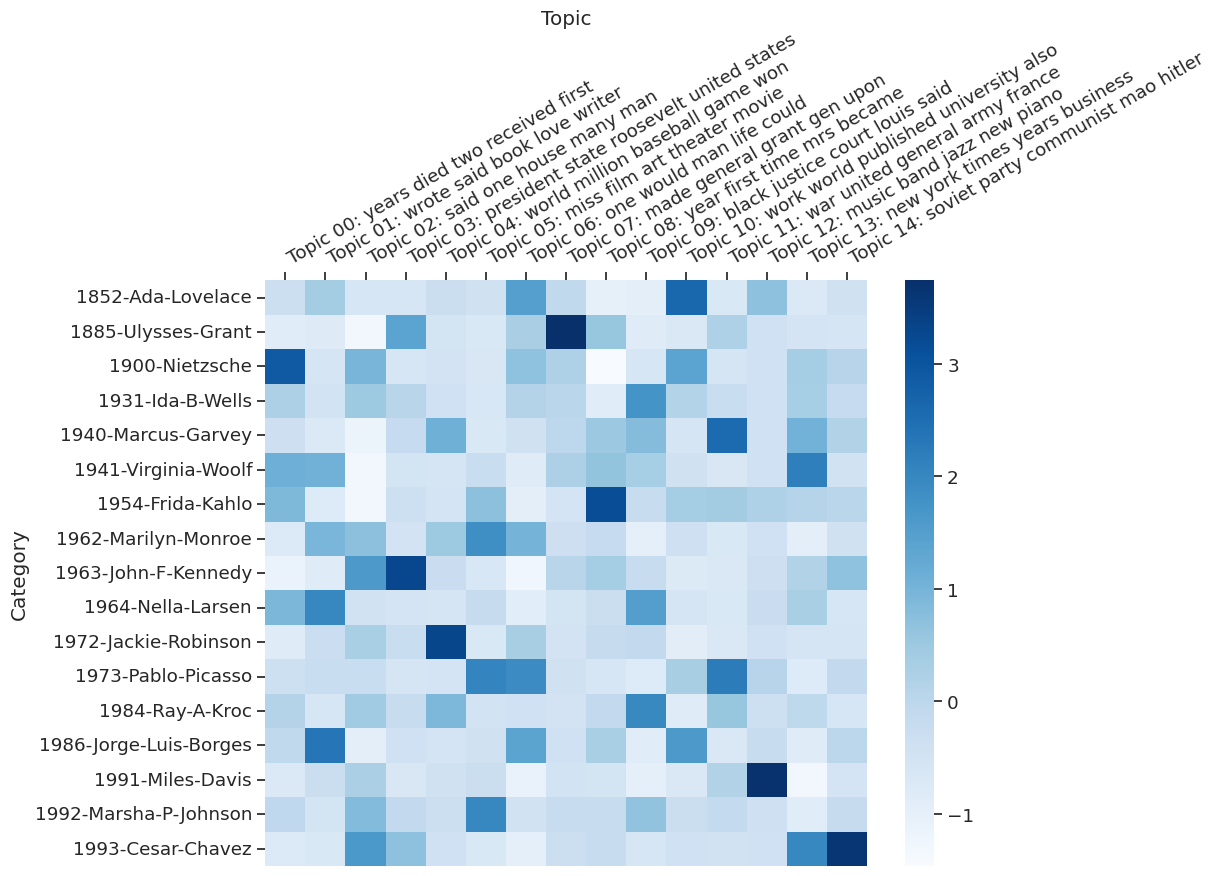

In [38]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(12,9))
# For all possible color maps, see https://matplotlib.org/stable/tutorials/colors/colormaps.html#miscellaneous

The darker squares in this heatmap represent a high probability for the corresponding topic (compared to everyone else in the heatmap) and the lighter squares in the heatmap represent a low probability for the corresponding topic. For example, if you scan across the row of Marilyn Monroe, you can see a dark square for the topic “miss film theater movie theater broadway”. If you scan across the row of Ada Lovelace, an English mathematician who is now recognized as the first computer programmer, according to her [NYT obituary](https://www.nytimes.com/interactive/2018/obituaries/overlooked-ada-lovelace.html), you can see a dark square for “university professor research science also”.

## Output a CSV File

In [41]:
import pandas as pd

topic_results = []
for title, topic_distribution in zip(titles, topic_distributions):
    topic_results.append({'document': title, 'topic_distribution': topic_distribution})

df = pd.DataFrame(topic_results)
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]
df[column_names] = pd.DataFrame(df['topic_distribution'].tolist(), index = df.index)
df = df.drop('topic_distribution', axis='columns')

In [42]:
df

,document,Topic 0 years died two received,Topic 1 wrote said book love,Topic 2 said one house many,Topic 3 president state roosevelt united,Topic 4 world million baseball game,Topic 5 miss film art theater,Topic 6 one would man life,Topic 7 made general grant gen,Topic 8 year first time mrs,Topic 9 black justice court louis,Topic 10 work world published university,Topic 11 war united general army,Topic 12 music band jazz new,Topic 13 new york times years,Topic 14 soviet party communist mao
0,1950-A-J-Dempster,0.262582,0.004310,0.012991,0.010039,0.003682,0.003003,0.046518,0.029415,0.075920,0.004201,0.358070,0.049011,0.001573,0.112804,0.025882
1,1965-David-O-Selznick,0.049112,0.133487,0.091684,0.019102,0.055976,0.287243,0.088801,0.030809,0.094096,0.041099,0.015067,0.004721,0.003755,0.083800,0.001248
2,1891-P-T-Barnum,0.117564,0.016717,0.024951,0.016387,0.023469,0.010183,0.210986,0.137984,0.109206,0.085215,0.021368,0.003027,0.005257,0.216258,0.001428
3,2000-Pierre-Trudeau,0.068996,0.022880,0.115286,0.057415,0.007272,0.004326,0.126067,0.060471,0.137018,0.036688,0.052471,0.038214,0.015125,0.015119,0.242653
4,1997-James-Stewart,0.080031,0.153064,0.252109,0.040209,0.052336,0.131763,0.085876,0.026942,0.048060,0.011359,0.030856,0.027804,0.015560,0.034145,0.009885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,1998-Bella-Abzug,0.060029,0.024151,0.254927,0.186329,0.014617,0.000346,0.066865,0.039887,0.152030,0.110641,0.014953,0.007006,0.000857,0.031937,0.035425
375,1980-Jesse-Owens,0.117232,0.006429,0.124288,0.030269,0.226807,0.004307,0.082982,0.008611,0.144086,0.082768,0.075523,0.030893,0.002165,0.045105,0.018534
376,1974-Sylvia-Plath,0.052705,0.161348,0.093340,0.013902,0.048129,0.042239,0.240359,0.065866,0.121596,0.023926,0.100365,0.004818,0.000384,0.030423,0.000599
377,1875-Andrew-Johnson,0.042258,0.000472,0.019399,0.311170,0.002329,0.000971,0.100109,0.270282,0.126442,0.021003,0.032180,0.001519,0.000172,0.050880,0.020812


In [43]:
df.sort_values(by='Topic 5 miss film art theater', ascending=False)[:6]

,document,Topic 0 years died two received,Topic 1 wrote said book love,Topic 2 said one house many,Topic 3 president state roosevelt united,Topic 4 world million baseball game,Topic 5 miss film art theater,Topic 6 one would man life,Topic 7 made general grant gen,Topic 8 year first time mrs,Topic 9 black justice court louis,Topic 10 work world published university,Topic 11 war united general army,Topic 12 music band jazz new,Topic 13 new york times years,Topic 14 soviet party communist mao
217,1990-Greta-Garbo,0.063898,0.080357,0.124056,0.015635,0.043800,0.359681,0.092201,0.044070,0.075005,0.010819,0.040012,0.018838,0.003627,0.009814,0.018186
347,1959-Ethel-Barrymore,0.134818,0.094792,0.058961,0.003186,0.041832,0.339919,0.113819,0.037597,0.125583,0.005538,0.001323,0.000431,0.009708,0.032002,0.000491
10,1990-Rex-Harrison,0.034448,0.189054,0.070984,0.002286,0.035518,0.310136,0.083954,0.078726,0.069307,0.000957,0.033515,0.011160,0.033704,0.037690,0.008561
367,1982-Lee-Strasberg,0.112691,0.096943,0.076245,0.011974,0.024174,0.301229,0.104996,0.034672,0.087135,0.014214,0.071673,0.001528,0.040537,0.019288,0.002703
122,1994-Jessica-Tandy,0.050420,0.168494,0.097930,0.001781,0.067354,0.300918,0.129907,0.032172,0.082011,0.007690,0.025022,0.001553,0.010677,0.022482,0.001587
131,1969-Judy-Garland,0.069567,0.134748,0.064667,0.001271,0.034573,0.299925,0.119330,0.040796,0.137880,0.002756,0.026044,0.000272,0.036530,0.031331,0.000310


In [44]:
df.to_csv('Topic-Distributions.csv', encoding='utf-8', index=False)

## Your Turn!

Choose a topic from the results above and write down its corresponding topic number below.

**Topic: *Your Number Choice Here***

**1.** Display the top 6 obituary titles for this topic.

In [ ]:
#Your Code Here

**2.** Display the topic words in the context of the original obituary for these 6 top titles.

In [ ]:
#Your Code Here

**3.** Come up with a label for your topic and write it below:

**Topic Label: *Your Label Here***

**Reflection**

**4.** Why did you label your topic the way you did? What do you think this topic means in the context of all the *NYT* obituaries?

**#**Your answer here

**5.** What's another collection of texts that you think might be interesting to topic model? Why?

**#**Your answer here